<a href="https://colab.research.google.com/github/JacquelinneGutierrez/PruebaAS/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

# **Tesla**

Si hicieramos una suposición de que trabajamos para la empresa Tesla de automoviles. El trabajo nuestro consistirá en verificar como se han comportado las ventas anuales en estados unidos, luego hacer un análisis de esas ventas. Para ello extraemos los datos mediante la biblioteca yfinance, que nos permitirá extraer de Yahoo finanzas datos e información de las ventas.

Instalamos la librería yfinance
Esta librería permite descargar datos históricos financieros desde Yahoo Finanzas. Podremos acceder de un modo sencillo a una interesante gama de datos.

In [9]:
!pip install yfinance
!pip install yahoofinancials


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 685.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38617 sha256=af637e8bc224b0427b2aff28baae75342f9b8be55944f8d7bd79e3c427a72982
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


In [1]:
!pip install pandas

# **Importamos las librerías "yfinance" y "pandas"**

In [35]:
import yfinance as yf
import pandas as pd

Hacemos uso de la libreria yfinance para extraer datos ventas
Utilizando el método Ticker() podemos extraer información bursátil pasandole como parámetro las siglas identificativas de con las que a la empresa es identificada. Utilizaremos la de Tesla, sus siglas son  TSLA.

In [8]:
 tesla = yf.Ticker("TSLA")

Usando el atributo info podemos extraer información de las ventas de Tesla en un diccionario de Python.

In [10]:
tesla_info=tesla.info
tesla_info #mostramos lo que tiene la variable

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

Como ya tenemos un diccionario, podemos extraer la información a partir del campo clave. Extraemos por ejemplo el país mediante la clave tesla_info['country']

In [16]:
tesla_info['country']

'United States'

Utilizamos history() para poder recoger el historial de datos de la base. Utilizamos (max) para recoge el histórico completo desde la primera venta.

In [17]:
historico_tesla = tesla.history(period="max")
print(historico_tesla)

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2024-05-15 00:00:00-04:00  179.899994  180.000000  173.110001  173.990005   
2024-05-16 00:00:00-04:00  174.100006  175.789993  171.429993  174.839996   
2024-05-17 00:00:00-04:00  173.550003  179.630005  172.750000  177.460007   
2024-05-20 00:00:00-04:00  177.559998  177.750000  173.520004  174.949997   
2024-05-21 00:00:00-04:00  175.509995  186.880005  174.710007  186.600006   

 Utilizamos head() para ver las primeras líneas o las ultimas respectivamente. Como parámetro ponemos el número de lineas a visualizar, si no se le proporciona este parámetro por defecto muestra cinco líneas. En nuestro caso pondremos la visualización de los 10 primeras lineas de venta.

In [18]:
historico_tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [19]:
print(historico_tesla["Close"].head(10))

Date
2010-06-29 00:00:00-04:00    1.592667
2010-06-30 00:00:00-04:00    1.588667
2010-07-01 00:00:00-04:00    1.464000
2010-07-02 00:00:00-04:00    1.280000
2010-07-06 00:00:00-04:00    1.074000
2010-07-07 00:00:00-04:00    1.053333
2010-07-08 00:00:00-04:00    1.164000
2010-07-09 00:00:00-04:00    1.160000
2010-07-12 00:00:00-04:00    1.136667
2010-07-13 00:00:00-04:00    1.209333
Name: Close, dtype: float64


In [20]:
historico_tesla.reset_index(inplace=True)

Graficamos las ventas por fecha. Usamos el campo Close y el campo Date:

<Axes: xlabel='Date'>

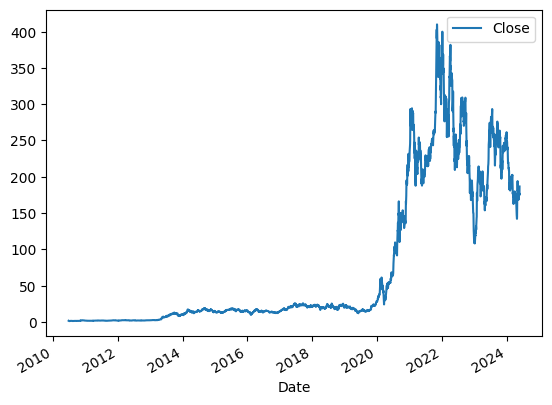

In [21]:
historico_tesla.plot(x="Date", y="Close")